In [153]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from scipy import sparse
from scipy.sparse import csgraph

In [247]:
mutinf_df = pd.read_csv('/home/fatemeh/projects/mantis2/mantis/newOrder3.out.mutinfo', sep='\t', header=None)
mutinf_df.columns = ['i', 'j', 'mutinf']

In [248]:
dist_df = pd.read_csv('/home/fatemeh/projects/mantis2/mantis/newOrder3.out', sep='\t', header=None)
dist_df.columns = ['i', 'j', 'dist']

(array([  4.08151000e+06,   4.95234000e+05,   4.69878000e+05,
          3.87208000e+05,   3.56112000e+05,   2.76798000e+05,
          1.96468000e+05,   1.33052000e+05,   8.77400000e+04,
          6.56720000e+04,   4.22620000e+04,   2.73320000e+04,
          2.45700000e+04,   2.43900000e+04,   8.01400000e+03,
          3.00000000e+03,   1.81600000e+03,   1.19800000e+03,
          5.64000000e+02,   3.90000000e+02,   2.62000000e+02,
          2.68000000e+02,   1.62000000e+02,   1.60000000e+02,
          1.14000000e+02,   1.18000000e+02,   7.40000000e+01,
          7.60000000e+01,   4.40000000e+01,   3.60000000e+01,
          3.60000000e+01,   2.40000000e+01,   3.40000000e+01,
          3.20000000e+01,   1.60000000e+01,   2.00000000e+01,
          8.00000000e+00,   1.00000000e+01,   1.00000000e+01,
          4.00000000e+00,   8.00000000e+00,   8.00000000e+00,
          1.00000000e+01,   1.00000000e+01,   1.60000000e+01,
          1.40000000e+01,   8.00000000e+00,   6.00000000e+00,
        

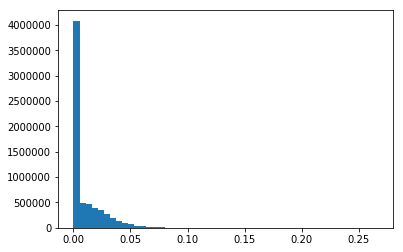

In [220]:
plt.hist(mutinf_df['mutinf'], bins=50)

In [300]:
print('mutinfo mean: {}'.format(mutinf_df.mutinf.mean()))
print('mutinfo median: {}'.format(mutinf_df.mutinf.median()))
print('hamming dist mean: {}'.format(dist_df.dist.mean()))
print('hamming dist median: {}'.format(dist_df.dist.median()))

mutinfo mean: 0.009691046269140824
mutinfo median: 0.00140579
hamming dist mean: 24214.566500348104
hamming dist median: 19622.0


In [214]:
mutinf_df[(mutinf_df.i == 844) & (mutinf_df.j == 921)]

,i,j,dist
2182660,844,921,0.000711


In [216]:
res = pd.merge(mutinf_df, dist_df, on = ['i', 'j'], how='inner')

In [217]:
res.sort_values(['dist_x'])

,i,j,dist_x,dist_y
4379898,1694,936,2.805560e-17,29365
2421248,936,1694,2.805560e-17,29365
5361038,2073,2378,7.001800e-17,15987
6149157,2378,2073,7.001800e-17,15987
5879510,2274,1264,1.676010e-16,12301
3269691,1264,2274,1.676010e-16,12301
3103742,1200,1765,2.608810e-16,23200
4563696,1765,1200,2.608810e-16,23200
5504650,2129,1229,3.134320e-16,17326
3179071,1229,2129,3.134320e-16,17326


In [255]:
def thresh_filter(row):
    if row['mutinf'] >= 0.01:
        return 1
    return 0
mutinf_df['adj'] = mutinf_df.apply(thresh_filter, axis=1)

In [249]:
def thresh_filter(row):
    if row['dist'] >= 0.003:
        return 1
    return 0
dist_df['adj'] = dist_df.apply(thresh_filter, axis=1)

In [252]:
sim = sparse.csr_matrix((mutinf_df.adj, (mutinf_df.i, mutinf_df.j)))

In [253]:
newOrder = csgraph.reverse_cuthill_mckee(sim, symmetric_mode=True)

In [257]:
newOrder[0:10]

array([1336, 1319, 2585, 2584, 2583, 2582, 2581, 2580, 2579, 2578], dtype=int32)

In [246]:
np.savetxt('/home/fatemeh/projects/mantis2/mantis/mutinfo_newOrder.out', newOrder, delimiter='\t', fmt='%d')

In [ ]:
n = 2586
p = np.identity(n)
dist = np.zeros([n, n])
for idx, row in dist_df.iterrows():
    dist[row['i'], row['j']] = row['dist']
real_dist = dist

In [284]:
n = 2586
p = np.identity(n)
dist = np.zeros([n, n])
for idx, row in dist_df.iterrows():
    dist[row['i'], row['j']] = row['dist']
real_dist = dist
#dist = np.matrix([[0,4,3,1], [4,0,1,3], [3,1,0,2], [1,3,2,0]])

In [335]:
n = 4
p = np.identity(n)
dist = np.matrix([[0,4,3,1], [4,0,1,3], [3,1,0,2], [1,3,2,0]])
dist

matrix([[0, 4, 3, 1],
        [4, 0, 1, 3],
        [3, 1, 0, 2],
        [1, 3, 2, 0]])

In [337]:
dist = real_dist
n = 2586
p = np.identity(n)

# STS

Input : D (distance matrix n-by-n) and X ().

1. Set X0 = X, t = 0, define P−1 = In×n.

2. Calculate St = DXt.

3. Find Pt which sorts St in a descending order.

4. If PtSt ≠ Pt−1St, set Xt+1 = PtTX0, set t = t + 1 and go to 2.

5. Output PtDPtT.

In [338]:
x0 = np.matrix([[(i - (n + 1)/2)] for i in range(n)])
x = x0
print(x.shape)
prevp = np.identity(n)

(2586, 1)


In [339]:
while True:
    s = dist*x
    sidx = np.argsort(s.flatten())
    p = np.zeros( (n,n) )
    for i in range(n):
        p[n-i-1][sidx[0,i]] = 1
    if np.array_equal(p*s, prevp*s):
        break
    x = p.transpose()*x0
    prevp = p

In [297]:
np.savetxt('/home/fatemeh/projects/mantis2/mantis/sts_newOrder.out', np.nonzero(p)[1], delimiter='\t', fmt='%d')

In [380]:
dist_reordered = np.matmul(np.matmul(p,dist),p.transpose())
dist_reordered

array([[      0.,    7292.,    6993., ...,   91128.,  111338.,  122381.],
       [   7292.,       0.,    2217., ...,   91208.,  111616.,  122679.],
       [   6993.,    2217.,       0., ...,   91521.,  111939.,  123018.],
       ..., 
       [  91128.,   91208.,   91521., ...,       0.,   94342.,  104877.],
       [ 111338.,  111616.,  111939., ...,   94342.,       0.,   34505.],
       [ 122381.,  122679.,  123018., ...,  104877.,   34505.,       0.]])

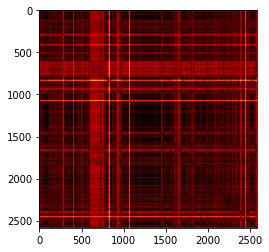

In [381]:
plt.imshow(dist, cmap='hot', interpolation='nearest')
plt.show()

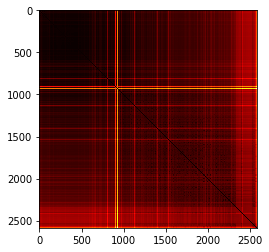

In [382]:
plt.imshow(dist_reordered, cmap='hot', interpolation='nearest')
plt.show()

# Neighborhood

In [11]:
sigma = 1
w = np.matrix([[np.exp((-1*(i-j)**2)/(n*sigma)) for i in range(n)] for j in range(n)])

In [12]:
w

matrix([[ 1.        ,  0.71653131,  0.26359714],
        [ 0.71653131,  1.        ,  0.71653131],
        [ 0.26359714,  0.71653131,  1.        ]])

In [13]:
w.transpose()

matrix([[ 1.        ,  0.71653131,  0.26359714],
        [ 0.71653131,  1.        ,  0.71653131],
        [ 0.26359714,  0.71653131,  1.        ]])

In [15]:
m=dist*w

In [21]:
df = pd.read_csv('/home/fatemeh/projects/mantis2/mantis/edit.dist', sep='\t')
df.head()
df.columns = ['i', 'j', 'd']

In [25]:
print(df.d.min())
print(df.d.max())

9127650.0
120401000.0


In [28]:
df.sort_values(['d']).d.unique()

array([  9.12765000e+06,   1.04016000e+07,   1.13480000e+07,
         1.14027000e+07,   1.33238000e+07,   1.37157000e+07,
         1.38880000e+07,   1.45492000e+07,   1.50542000e+07,
         1.53976000e+07,   1.70334000e+07,   2.00591000e+07,
         2.33042000e+07,   2.45552000e+07,   2.46824000e+07,
         2.58124000e+07,   2.69738000e+07,   2.72096000e+07,
         2.79108000e+07,   2.80687000e+07,   2.82911000e+07,
         2.85885000e+07,   2.88808000e+07,   2.89735000e+07,
         2.91108000e+07,   2.92357000e+07,   2.95731000e+07,
         2.96687000e+07,   3.02948000e+07,   3.03156000e+07,
         3.03678000e+07,   3.05400000e+07,   3.06929000e+07,
         3.07814000e+07,   3.07926000e+07,   3.10635000e+07,
         3.12246000e+07,   3.15086000e+07,   3.15388000e+07,
         3.16280000e+07,   3.21638000e+07,   3.22866000e+07,
         3.25144000e+07,   3.25793000e+07,   3.26005000e+07,
         3.26856000e+07,   3.27398000e+07,   3.29457000e+07,
         3.31719000e+07,